<h1><center>Cómo sobrevivir a una invasión zombi: usando matemática (edición 2023)</center></h1>






#Guía de trabajo

<h2> Primera Parte</h2>

Supongamos que todos los humanos vivimos en un edificio y salimos todos juntos. Pero cada vez que salimos, se infecta <font color="blue">la décima parte</font> del grupo:
 $$\begin{array}{cccc}
   h_0 & \phantom{aa} & h_1=h_0-\frac{h_0}{10} & \dots \\ 
   t=0 & \phantom{aa} & t=1 & \dots \\
  \end{array}$$
 ¿Cuántos humanos somos a tiempo $n$ con respecto a lo que había al principio?

 $$ \begin{align*}
 h_{n+1} &= h_n-\frac{1}{10}h_{n}\\ 
         &= \bigg(\frac{9}{10}\bigg) h_n 
     \end{align*}$$
     
También lo podemos expresar en función de los que había inicialmente
     
         
  $$ \begin{align*}        
       h_{n+1}&=\bigg(\frac{9}{10}\bigg) h_n = \bigg(\frac{9}{10}\bigg)\bigg(\frac{9}{10}\bigg) h_{n-1} \\
         &= \bigg(\frac{9}{10}\bigg)^2 h_{n-1} \\
         &= \dots  \\
         &= \bigg(\frac{9}{10}\bigg)^{n+1} h_0 
   \end{align*}$$

 ¿Cómo será el gráfico de la cantidad de humanos en función del tiempo?
 
 
 



In [26]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Humanos en el tiempo')

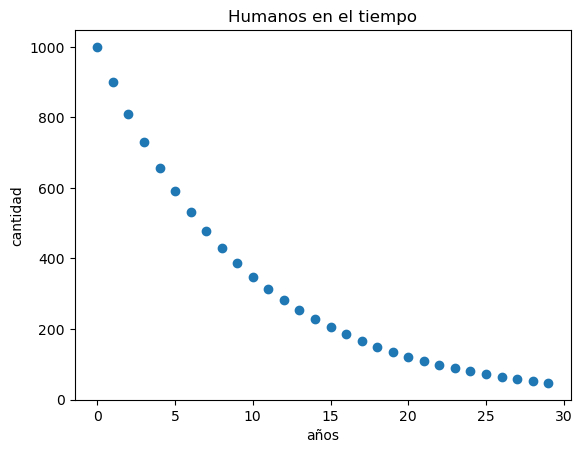

In [27]:
# Definimos a cuantos años queremos ver la evolución
N=30
h= np.zeros(N)
# Vamos a guardar la cantidad de humanos que hay cada año. En principio, tenemos sólo los del primer año. 
h[0] = 1000
for i in range(0,N-1):
    h[i+1]=9/10*h[i]
# Graficamos:
plot(h,'o') #grafica circulitos. 
plt.xlabel('años')
plt.ylabel('cantidad')
plt.title('Humanos en el tiempo')


Pensemos ahora en la cantidad de zombis que, cada vez que salen los humanos, aumenta (porque los humanos se convierten en zombis). Supongamos que estamos en un caso donde, cada vez que salen los humanos, la cantidad de zombis aumenta en <font color="blue">un décimo</font>:
$$\begin{array}{cccc}
   z_0 & \phantom{aa} & z_1=z_0+\frac{z_0}{10} & \dots \\ 
   t=0 & \phantom{aa} & t=1 & \dots \\
  \end{array}$$
 ¿Cuántos zombis hay a tiempo $n$ con respecto a lo que había al principio? Razonamos como antes:

 $$z_{n+1} = z_n+\frac{1}{10}z_n = \Big(\frac{11}{10}\Big)z_n = \dots = \Big(\frac{11}{10}\Big)^{n+1} z_0 $$
 
 ¿Cómo sería un gráfico de la cantidad de zombis en función del tiempo?

Text(0.5, 1.0, 'Zombis en el tiempo')

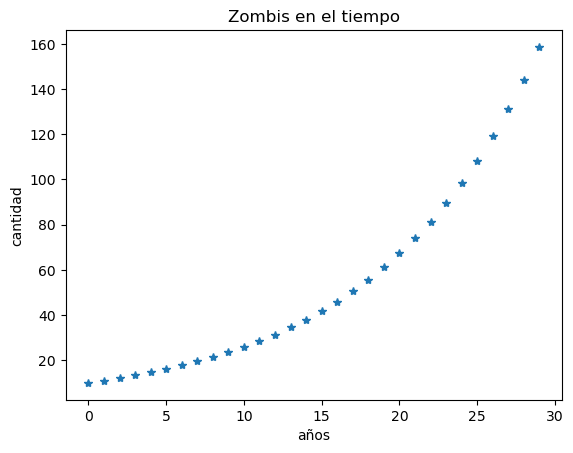

In [28]:
# Definimos a cuantos años queremos ver la evolución
N=30
z= np.zeros(N)
# Vamos a guardar la cantidad de zombis que hay cada año. En principio, tenemos sólo los del primer año. 
z[0] = 10
for i in range(0,N-1):
    z[i+1]=11/10*z[i]
# Graficamos:
plot(z,'*') #grafica estrellass. 
plt.xlabel('años')
plt.ylabel('cantidad')
plt.title('Zombis en el tiempo')


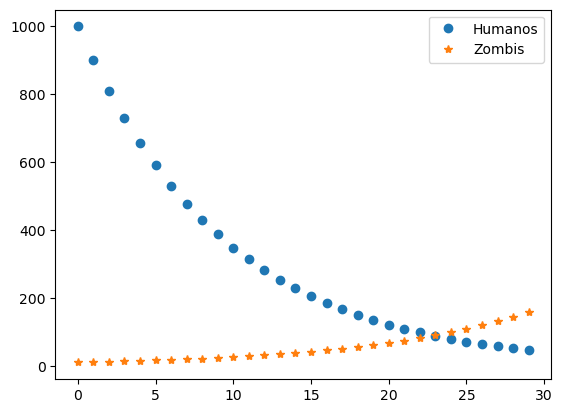

In [29]:
plot(h,'o',label="Humanos")
plot(z,'*',label="Zombis")
plt.legend()

Cuantos humanos y cuantos zombis habrá en 15 años según este modelo?


In [30]:
print(h[15],z[15])

205.8911320946491 41.77248169415655


Conclusión, en cada caso tenemos que:
$$h_{n}=\alpha^n h_0, \hspace{2cm} z_{n}=\beta^n z_0.$$
para ciertos valores de $\alpha$ y $\beta$,  

¿Qué podemos deducir un comportamiento cuando el tiempo $n$ se hace cada vez más grande?



<h4>Observar como varia el comportamineto dependiendo de los valores de $\alpha$ y $\beta$ <h4>


<h3>Competencia entre especies</h3>


1.   Pero la cantidad de zombis y la cantidad de humanos dependen una de la otra. Empecemos suponiendo simplemente que la cantidad de zombis aumenta proporcionalmente a la cantidad de humanos. Entonces: 
$$\left\lbrace\begin{array}{rcl}h_{k+1} & = & h_k-\alpha h_k \\ z_{k+1} & = & z_k+\alpha h_k \end{array}\right.$$

¿Cómo es la evolución de las poblaciones si, por ejemplo, $h_0=1000$, $z_0=10$, $\alpha = 0.1$?

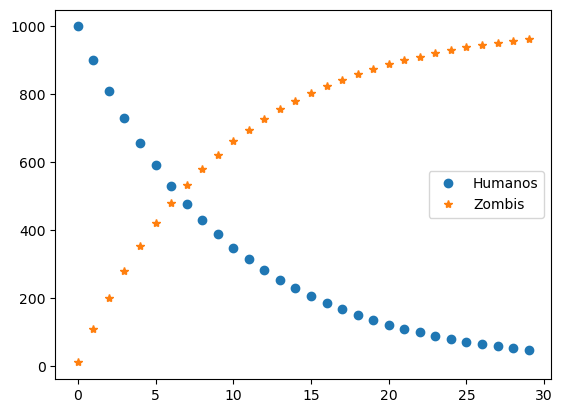

In [31]:
h[0]    = 1000
z[0]    = 10
alfa = 0.1
for i in range(0,N-1):
    h[i+1]=h[i]-alfa*h[i];
    z[i+1]=z[i]+alfa*h[i];

plot(h,'o')
plot(z,'*')
legend(['Humanos','Zombis'])
plt.savefig("Humanos_versus_Zombis_M1.jpg")

2.   Tengamos en cuenta la interacci\'on de humanos y zombis y la capacidad de los humanos para defenderse y de los zombis para infectar!

$\alpha=$ efectividad con que los zombis contagian a los humanos.

 $\beta=$ efectividad con que los humanos matan a los zombis.

$$ \begin{aligned}
h_{n+1} = &\, h_n - \alpha z_n h_n  \\
z_{n+1} = & \, z_n  - \beta z_n h_n +  \alpha z_n h_n
\end{aligned} $$

Probamos con $h_0=1000$, $z_0=10$, $\alpha=0.003$ y $\beta=0.001$
<br>¿Qué ocurre con la cantidad total de individuos (humanos + zombis)?
<br>¿Y si se invierten los valores de $\alpha$ y $\beta$?

755.8114783547297


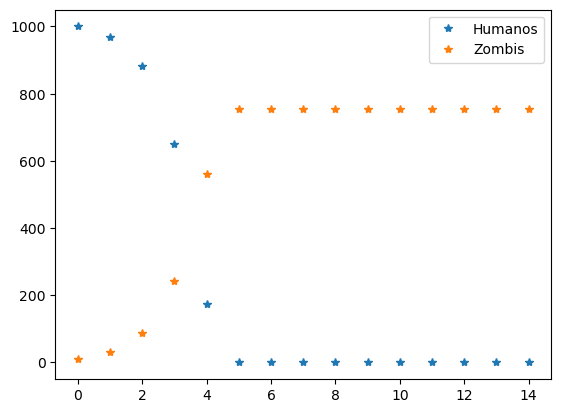

In [32]:
M=15
h= np.zeros(M)
z= np.zeros(M)
h[0] = 1000
z[0] = 10
alfa = 0.003
beta = 0.001
for i in range(0,M-1):
    h[i+1] =max(h[i]-alfa*h[i]*z[i],0) 
    z[i+1] =max(z[i]+ (alfa -beta)*z[i]*h[i],0);

plot(h,'*')
plot(z,'*')
legend(['Humanos','Zombis'])
print(h[M-1]+z[M-1])


<h2> Segunda Parte</h2>

3.  Veamos un modelo más complejo. Consideremos los siguiente:

  *   Los humanos nacemos proporcionalmente a nuestra población (tasa de natalidad TN)
  *   Para que un humano se convierta en zombi, se tiene que encontrar un humano con un zombi, tiene que haber interacción y hay una tasa de efectividad $a$ con la que los zombis logran contagiar a los humanos.
  *   Los humanos morimos por causas ajenas a los zombis proporcionalmente a nuestra población (tasa de mortalidad TM).
  *   Los zombis no se reproducen ni mueren por causas naturales.
  *   Los zombis pueden morir cuando hay encuentro con humanos porque los humanos los matamos con una tasa de efectividad $b$.

Las ecuaciones quedan:
$$\left\lbrace\begin{array}{rcl}h_{n+1} & = & h_n+ TN h_n - TM h_n - a h_n z_n \\ 
z_{n+1} & = & z_n+a h_n z_n -b h_n z_n \\
\end{array}\right.$$

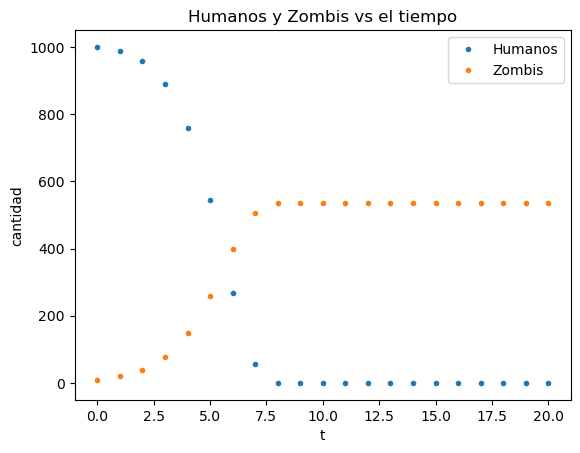

In [33]:
TN = 0.017
TM = 0.008

a = 0.002
b = 0.001

h0 = 1000
z0 = 10
h  = [h0]
z  = [z0]

tiempo_simulacion = 20 

for i in range(0,tiempo_simulacion):
    h.append(max(h[i]+(TN-TM)*h[i]-a*h[i]*z[i],0))
    z.append(max(z[i]+(a-b)*h[i]*z[i],0))

plot(h,'.')
plot(z,'.')
title('Humanos y Zombis vs el tiempo')
xlabel('t')
ylabel('cantidad')
legend(['Humanos','Zombis'])

¿Qué ocurre si se modifican los parámetros?. Por ejemplo, si se aumenta el valor de $b$ a $0.0015$? ¿y si $b=0.002$? ¿y si $b>a$?

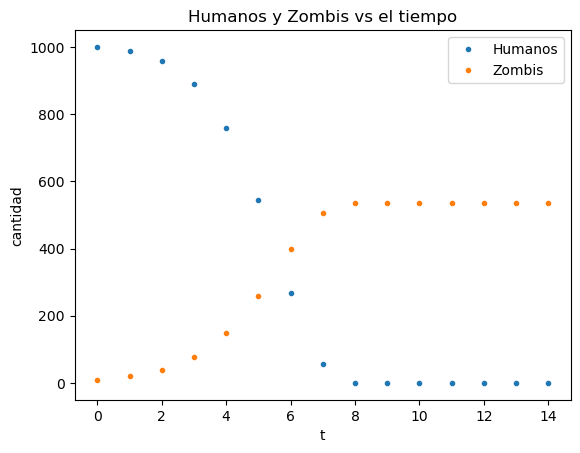

In [34]:
TN = 0.017
TM = 0.008

a = 0.002
b = 0.001

h0 = 1000
z0 = 10
h  = [h0]
z  = [z0]

Tf=15 #Tiempo final
for i in range(0,Tf-1):
    h.append(max(h[i]+(TN-TM)*h[i]-a*h[i]*z[i],0)); 
    z.append(max(z[i]+(a-b)*h[i]*z[i],0));

plot(h,'.')
plot(z,'.')
title('Humanos y Zombis vs el tiempo')
xlabel('t')
ylabel('cantidad')
legend(['Humanos','Zombis'])

Probemos también qué ocurre si se deja $b=0.001$ pero se disminuye $a$, o se aumenta $N$ o se disminuye $M$.

4. Se puede observar una dinámica interesante si contemplamos la posibilidad de que los zombis "mueran" por "causas naturales". En ese caso, las ecuaciones quedan:
$$\left\lbrace\begin{array}{rcl}h_{n+1} & = & h_n+(TN-TM) h_n - a h_n z_n \\ 
z_{n+1} & = & c z_n+(a-b) h_n z_n \\
\end{array}\right.$$
Donde $c$ es la proporción de zombis que sobrevivirían con independencia de los encuentros con humanos.

Problemos este modelo con $TN = 0.017$, $TM = 0.008$, $a = 0.002$, $b = 0.001$ y $c=0.99$ y con una cantidad más pareja de humanos y zombis.

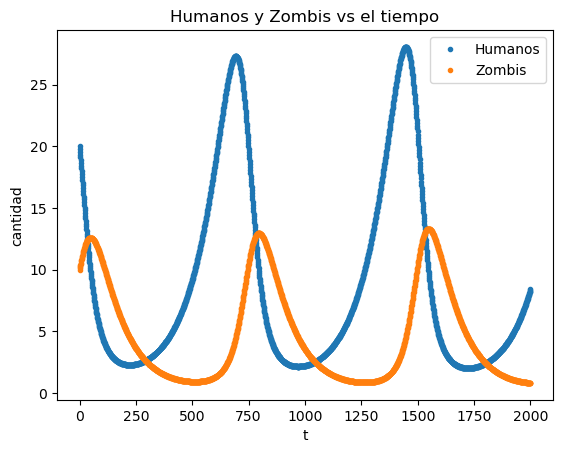

In [35]:
TN = 0.017
TM = 0.008

a = 0.002
b = 0.001

c = 0.99

h0 = 20
z0 = 10
h  = [h0]
z  = [z0]

tiempo_simulacion = 2000 

for i in range(0,tiempo_simulacion):
    h.append(h[i]+(TN-TM)*h[i]-a*h[i]*z[i])
    z.append(c*z[i]+(a-b)*h[i]*z[i])

plot(h,'.')
plot(z,'.')
title('Humanos y Zombis vs el tiempo')
xlabel('t')
ylabel('cantidad')
legend(['Humanos','Zombis'])

¿Qué se observa en el gráfico anterior? ¿Qué pasa con la cantidad de zombis y de humanos?

En un caso como este es interesante también realizar el gráfico de las poblaciones una en función de la otra, sin mirar el tiempo. De la siguiente manera:

Text(0, 0.5, 'Zombis')

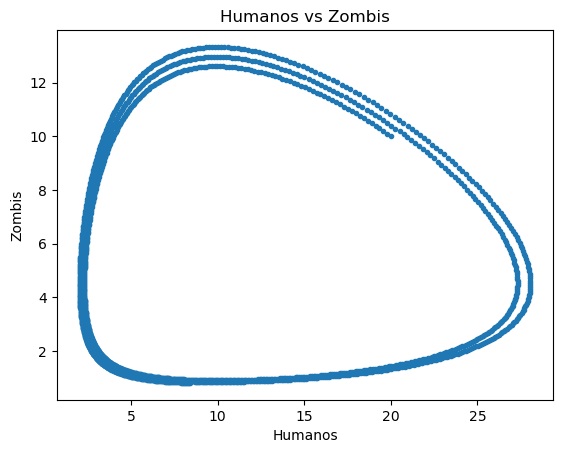

In [36]:
plot(h,z,'.')
title('Humanos vs Zombis')
xlabel('Humanos')
ylabel('Zombis')


¿Qué interpretar se puede hacer de este gráfico?

<h2> Yapa </h2>

Para terminar, consideremos el modelo para enfermedades infecciosas $SI$:
$$\left\lbrace\begin{array}{rcl}
S_{n+1} & = & S_n+ N(S_n+I_n)-m_1 S_n - a S_n I_n \\ 
I_{n+1} & = & I_n - m_2 I_n + a S_n I_n \\
\end{array}\right.$$
Consideremos por ejemplo: $N=0.17$, $m_1 = 0.08$, $a=0.0005$, $m_2 = 0.15$, con $S_0=1000$ e $I_0=5$.

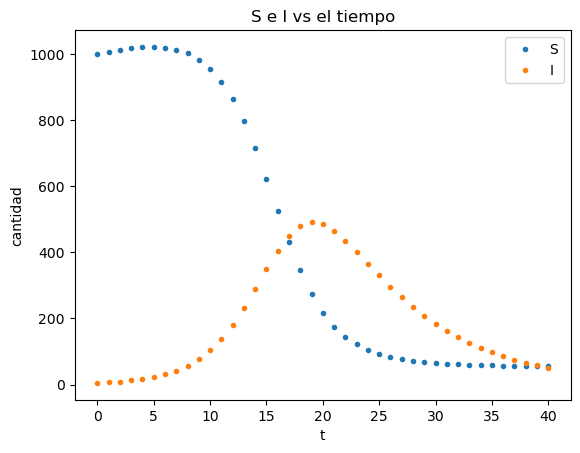

In [37]:
N  = 0.017
m1 = 0.008

a  = 0.0005
m2  = 0.15

S0  = 1000
I0  = 5
S   = [S0]
I   = [I0]

tiempo_simulacion  = 40
for i in range(0,tiempo_simulacion):
    S.append(max(S[i]+N*(S[i]+I[i])-m1*S[i]-a*S[i]*I[i],0)); 
    I.append(max(I[i]+a*S[i]*I[i]-m2*I[i],0));

plot(S,'.')
plot(I,'.')
title('S e I vs el tiempo')
xlabel('t')
ylabel('cantidad')
legend(['S','I'])